In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/nikita/Downloads/archive (2)/50_Startups.csv')

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     float64
 5   State_Florida     50 non-null     float64
 6   State_New York    50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [5]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [6]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [7]:
encodet_data = ohe.fit_transform(df[['State']])

In [ ]:
encodet_data.head(3)

In [9]:
df.drop(columns='State', axis=1, inplace=True)

In [10]:
df = pd.concat([df, encodet_data], axis=1)

In [ ]:
df.describe()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler().set_output(transform='pandas')

In [ ]:
pop = scaler.fit_transform(df)
df = pop
df.describe()

In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head(1)

In [17]:
X = df.drop(columns='Profit', axis=1)

In [18]:
y = df['Profit']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=4)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
print(f'R^2 is {r2_score(y_test, y_pred)}')

R^2 is 0.8533617699664905


Text(0, 0.5, 'Predicted Values')

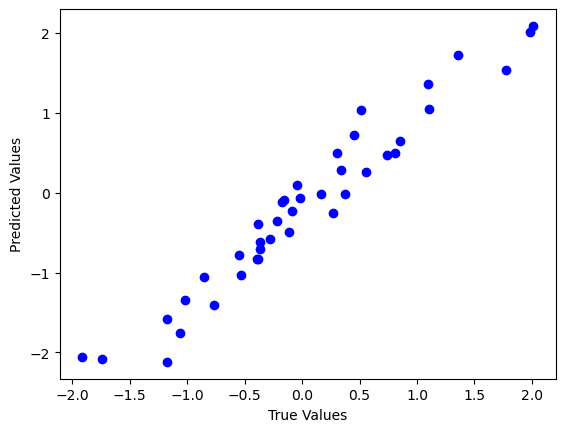

In [26]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')